In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go  #  is a lower-level interface for creating figures. 
import plotly.express as px        #   is a higher-level, more concise interface to create interactive plots quickly and with less code. 
import warnings
warnings.filterwarnings("ignore")


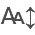

In [2]:
import itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [3]:
data = pd.read_csv("World Energy Consumption.csv")

In [4]:
data.shape

(22012, 129)

In [5]:
data.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...               0.0                 NaN   
1                      NaN  ...               0.0                 NaN   
2                      NaN  ...               0.0                 NaN   
3                      NaN  ...               0.0                 NaN   
4                      NaN  ...               0.0                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   NaN               0.0                     NaN   
1                   NaN               0.0                     NaN   
2                   NaN               0.0                     NaN   
3                   NaN               0.0                     NaN   
4                   NaN               0.0                     NaN   

   wind_share_elec  wind_share_energy  
0              0.0                NaN  
1              0.0                NaN  
2              0.0                NaN  
3              0.0                NaN  
4              0.0                NaN  

[5 rows x 129 columns]

In [6]:
# Define the structure of the CSV file by describing each column:

pd.read_csv("owid-energy-codebook.csv")

column  \
0                   country   
1                      year   
2                  iso_code   
3                population   
4                       gdp   
..                      ...   
124    wind_elec_per_capita   
125        wind_electricity   
126  wind_energy_per_capita   
127         wind_share_elec   
128       wind_share_energy   

                                           description  \
0                       Country - Geographic location.   
1                          Year - Year of observation.   
2    ISO code - ISO 3166-1 alpha-3 three-letter cou...   
3    Population - Population by country, available ...   
4    Gross domestic product (GDP) - This data is ad...   
..                                                 ...   
124  Electricity generation from wind power per per...   
125  Electricity generation from wind power - Measu...   
126  Wind power consumption per capita - Measured i...   
127  Share of electricity generated by wind power -...   
128  Share of primary energy consumption that comes...   

                               unit  \
0                               NaN   
1                               NaN   
2                               NaN   
3                           persons   
4    international-$ in 2011 prices   
..                              ...   
124                  kilowatt-hours   
125                  terawatt-hours   
126                  kilowatt-hours   
127                               %   
128                               %   

                                                source  
0                   Our World in Data - Regions (2023)  
1                   Our World in Data - Regions (2023)  
2    International Organization for Standardization...  
3    Population based on various sources (2023) [ht...  
4    Bolt and van Zanden - Maddison Project Databas...  
..                                                 ...  
124  Ember - Yearly Electricity Data (2024) [https:...  
125  Ember - Yearly Electricity Data (2024) [https:...  
126  Energy Institute - Statistical Review of World...  
127  Ember - Yearly Electricity Data (2024) [https:...  
128  Energy Institute - Statistical Review of World...  

[129 rows x 4 columns]

# Data Cleaning

**In our dataset in the country column, there aren't just countries but so many different political groups, continents, 
deemed to be countries or special status regions included which we have to find and remove as we our scope in this project is limited to countries only**

In [7]:
data.country.unique().tolist()

['ASEAN (Ember)',
 'Afghanistan',
 'Africa',
 'Africa (EI)',
 'Africa (Ember)',
 'Africa (Shift)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia & Oceania (EIA)',
 'Asia (Ember)',
 'Asia Pacific (EI)',
 'Asia and Oceania (Shift)',
 'Australia',
 'Australia and New Zealand (EIA)',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS (EI)',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central & South America (EIA)',
 'Central African Republic',
 'Central America (EI)',
 'Central and South America (Shift)',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croa

In [8]:
# Filter out entries representing political groups, continents, or entities deemed to be countries 
# or special status regions, as they are not relevant for our analysis or dataset.

data = data[~data.country.isin(["ASEAN (Ember)",'Africa (EI)',"Africa (Ember)","Africa (Shift)","Antarctica","Asia","Asia & Oceania (EIA)","Asia (Ember)",
                             "Asia Pacific (EI)","Asia and Oceania (Shift)","Australia and New Zealand (EIA)","CIS (EI)",
                             "Central & South America (EIA)","Central America (EI)","Central and South America (Shift)",
                            "EU28 (Shift)","East Germany (EIA)","East Timor","Eastern Africa (EI)",
                            "Eurasia (EIA)","Eurasia (Shift)","Europe","Europe (EI)""Europe (Ember)","Europe (Shift)","European Union (27)",
                            "European Union (EIA)","Falkland Islands","Faroe Islands","French Guiana","French Polynesia","G20 (Ember)",
                             "G7 (Ember)","Hawaiian Trade Zone (EIA)","High-income countries","IEO - Africa (EIA)","IEO - Middle East (EIA)",
                             "IEO OECD - Europe (EIA)","Latin America and Caribbean (Ember)","Low-income countries", "Lower-middle-income countries",
                             "Mexico, Chile, and other OECD Americas (EIA)","Micronesia (country)","Middle Africa (EI)","Middle East (EI)",
                             "Middle East (EIA)","Middle East (Ember)","Middle East (Shift)","Netherlands Antilles","New Caledonia","Non-OECD (EI)",
                             "Non-OECD (EIA)","Non-OPEC (EI)","Non-OPEC (EIA)","North America","North America (EI)","North America (Ember)",
                             "North America (Shift)","OECD (EI)","OECD (EIA)","OECD (Ember)","OECD (Shift)","OECD - Asia And Oceania (EIA)",
                             "OECD - Europe (EIA)","OECD - North America (EIA)","OPEC (EI)","OPEC (EIA)","OPEC (Shift)","OPEC - Africa (EIA)",
                             "OPEC - South America (EIA)","Oceania","Oceania (Ember)","Other Non-OECD - America (EIA)","Other Non-OECD - Asia (EIA)",
                             "Other Non-OECD - Europe and Eurasia (EIA)","Persian Gulf (EIA)","Persian Gulf (Shift)","Reunion","Saint Helena",
                             "Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","Sao Tome and Principe",
                             "South America","South Korea and other OECD Asia (EIA)","South Sudan","South and Central America (EI)","U.S. Pacific Islands (EIA)",
                             "U.S. Territories (EIA)","USSR","United States Pacific Islands (Shift)","United States Territories (Shift)",
                             "Upper-middle-income countries","Wake Island (EIA)","Wake Island (Shift)","West Germany (EIA)","Western Africa (EI)",
                             "Western Sahara","World",'Africa'])]

In [9]:
data.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
23  Afghanistan  1900      AFG   4707744.0  NaN                      NaN   
24  Afghanistan  1901      AFG   4751177.0  NaN                      NaN   
25  Afghanistan  1902      AFG   4802500.0  NaN                      NaN   
26  Afghanistan  1903      AFG   4861833.0  NaN                      NaN   
27  Afghanistan  1904      AFG   4921891.0  NaN                      NaN   

    biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
23                      NaN                      NaN                  NaN   
24                      NaN                      NaN                  NaN   
25                      NaN                      NaN                  NaN   
26                      NaN                      NaN                  NaN   
27                      NaN                      NaN                  NaN   

    biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
23                      NaN  ...               NaN                 NaN   
24                      NaN  ...               NaN                 NaN   
25                      NaN  ...               NaN                 NaN   
26                      NaN  ...               NaN                 NaN   
27                      NaN  ...               NaN                 NaN   

    wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
23                   NaN                   NaN               NaN   
24                   NaN                   NaN               NaN   
25                   NaN                   NaN               NaN   
26                   NaN                   NaN               NaN   
27                   NaN                   NaN               NaN   

    wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
23                   NaN               NaN                     NaN   
24                   NaN               NaN                     NaN   
25                   NaN               NaN                     NaN   
26                   NaN               NaN                     NaN   
27                   NaN               NaN                     NaN   

    wind_share_elec  wind_share_energy  
23              NaN                NaN  
24              NaN                NaN  
25              NaN                NaN  
26              NaN                NaN  
27              NaN                NaN  

[5 rows x 129 columns]

In [10]:
data.shape

(16113, 129)

**The International Energy Agency (IEA) is a Paris-based autonomous intergovernmental organisation, established in 1974, that provides policy recommendations, analysis and data on the global energy sector. The 31 member countries and 13 association countries of the IEA represent 75% of global energy demand.**

**The core activity of the IEA is providing policy advice to its member states and Associated countries to support their energy security and advance their transition to clean energy.**


In [11]:
# While data from the year 1900 is available, it would be more sensible to focus our analysis from 1974 onwards 
# to assess the influence of such regulatory bodies and its members on global energy security.

data = data[data['year']>=1974]

In [12]:
data.select_dtypes(exclude='object').columns.to_list()

['year',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
 'gas_

In [13]:
data.select_dtypes(include='object').columns.to_list()

['country', 'iso_code']

In [14]:
data.describe().T

count          mean           std           min  \
year                     9067.0  1.999504e+03  1.329782e+01  1.974000e+03   
population               8995.0  3.200356e+07  1.223924e+08  1.833000e+03   
gdp                      6733.0  3.924133e+11  1.326879e+12  1.642060e+08   
biofuel_cons_change_pct  1077.0  6.407671e+01  3.451642e+02 -1.000000e+02   
biofuel_cons_change_twh  1687.0  8.291974e-01  4.378498e+00 -3.754900e+01   
...                         ...           ...           ...           ...   
wind_elec_per_capita     5927.0  5.942299e+01  2.384450e+02  0.000000e+00   
wind_electricity         5999.0  4.277413e+00  3.322602e+01  0.000000e+00   
wind_energy_per_capita   3244.0  2.544347e+02  7.959618e+02  0.000000e+00   
wind_share_elec          5505.0  1.309761e+00  4.336857e+00  0.000000e+00   
wind_share_energy        2735.0  7.958121e-01  2.219104e+00  0.000000e+00   

                                  25%           50%           75%  \
year                     1.988000e+03  2.000000e+03  2.011000e+03   
population               1.322364e+06  6.571862e+06  2.073470e+07   
gdp                      1.631173e+10  5.495151e+10  2.357630e+11   
biofuel_cons_change_pct -1.386000e+00  8.329000e+00  3.090200e+01   
biofuel_cons_change_twh  0.000000e+00  0.000000e+00  2.880000e-01   
...                               ...           ...           ...   
wind_elec_per_capita     0.000000e+00  0.000000e+00  1.851000e+00   
wind_electricity         0.000000e+00  0.000000e+00  4.000000e-02   
wind_energy_per_capita   0.000000e+00  9.100000e-02  5.418625e+01   
wind_share_elec          0.000000e+00  0.000000e+00  1.290000e-01   
wind_share_energy        0.000000e+00  5.000000e-03  3.520000e-01   

                                  max  
year                     2.022000e+03  
population               1.425894e+09  
gdp                      1.815160e+13  
biofuel_cons_change_pct  5.659328e+03  
biofuel_cons_change_twh  6.087500e+01  
...                               ...  
wind_elec_per_capita     3.219852e+03  
wind_electricity         8.005200e+02  
wind_energy_per_capita   8.422012e+03  
wind_share_elec          5.684000e+01  
wind_share_energy        2.615700e+01  

[127 rows x 8 columns]

**When analyzing datasets, it's crucial to identify and understand the distribution of different features as well as to pinpoint any missing values. This can be achieved through various data visualization techniques and summary statistics that highlight these aspects. Addressing missing data is essential for maintaining the integrity of the dataset, and there are multiple strategies for handling them, such as imputation or exclusion, depending on the context and the nature of the data. Ensuring a thorough examination of these elements can lead to more accurate and reliable analytical outcomes.**

In [15]:
np.round(data.isna().sum()*100/data.shape[0])

country                    0.0
year                       0.0
iso_code                   2.0
population                 1.0
gdp                       26.0
                          ... 
wind_elec_per_capita      35.0
wind_electricity          34.0
wind_energy_per_capita    64.0
wind_share_elec           39.0
wind_share_energy         70.0
Length: 129, dtype: float64

In [16]:
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(1974, 2023):
        filtered_df = data[data['year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['country'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=data[column_name].min(),
            zmax=data[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(1974 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name.upper()} MAP',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

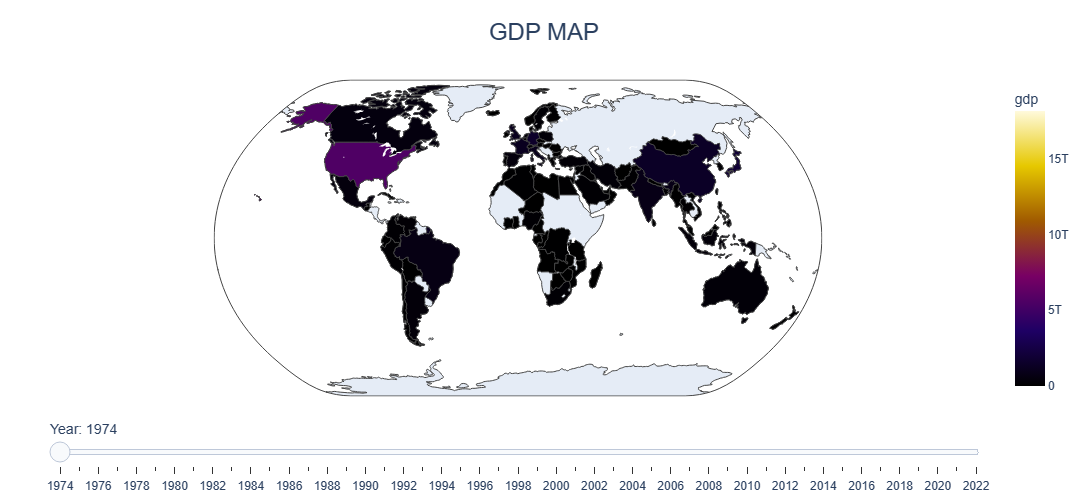

In [17]:
# Example usage, we may choose any column of our choice apart from country and year

column_name = 'gdp'
plot_world_map_with_slider(column_name)

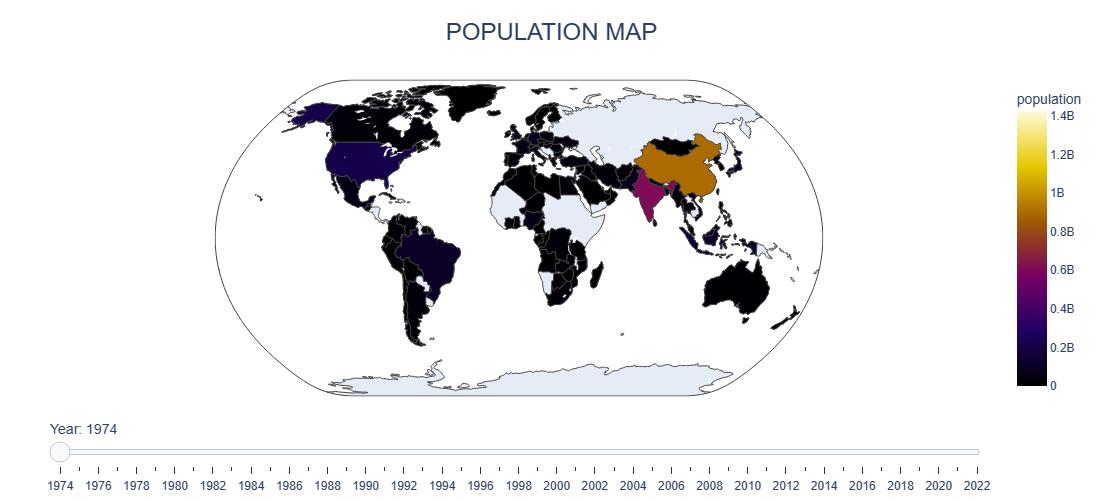

In [18]:
column_name = 'population'
plot_world_map_with_slider(column_name)

**Using Simple Imputer to fill missing values with 0 as filling with zero makes sense since it is possible that these values accounted to zero only or were not captured or available at the time of data collection**

In [19]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'constant',fill_value= 0)

In [20]:
data.iloc[:,5:] = si.fit_transform(data.iloc[:,5:])

#### <span style="color:green"> After replacing the missing values in the columns with zeros (excluding population, iso_code, and GDP columns), we have transformed our dataset into one that is more easily interpreted by the machine learning algorithm.</span>

<span style="color:green"> GDP is something we cannot make zero, hence I think of a better alternative to replace those Null values

1. I am using Exponential Weighted Averages and replacing the original values where NULL is present with these calculated values
2. Although since GDP varies country-wise, we can only impute or replace missing values where some small set of values are missing for a particular country.
3. Hence I am first of all removing all those countries which do not have any GDP data, it is crucial as GDP values will serve larger purpose later on as well

In [21]:
data[data['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0   
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
142                        0.0                      0.0                  0.0   
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
142                      0.000  ...             4.673                 0.0   
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
142                     0.0                   0.0               0.0   
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
142                     0.0               0.0                     0.0   
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [22]:
np.round(data.isna().sum())
#np.round(data.isna().sum()*100/data.shape[0]).sum()

country                      0
year                         0
iso_code                   146
population                  72
gdp                       2334
                          ... 
wind_elec_per_capita         0
wind_electricity             0
wind_energy_per_capita       0
wind_share_elec              0
wind_share_energy            0
Length: 129, dtype: int64

In [23]:
zero_gdp_countries = data.groupby(['country'])['gdp'].sum().reset_index()
countries_with_no_gdp_data = zero_gdp_countries[zero_gdp_countries['gdp'] == 0]['country'].tolist()
data = data[~data['country'].isin(countries_with_no_gdp_data)]

In [24]:
data[data['population'].isnull()]

Empty DataFrame
Columns: [country, year, iso_code, population, gdp, biofuel_cons_change_pct, biofuel_cons_change_twh, biofuel_cons_per_capita, biofuel_consumption, biofuel_elec_per_capita, biofuel_electricity, biofuel_share_elec, biofuel_share_energy, carbon_intensity_elec, coal_cons_change_pct, coal_cons_change_twh, coal_cons_per_capita, coal_consumption, coal_elec_per_capita, coal_electricity, coal_prod_change_pct, coal_prod_change_twh, coal_prod_per_capita, coal_production, coal_share_elec, coal_share_energy, electricity_demand, electricity_generation, electricity_share_energy, energy_cons_change_pct, energy_cons_change_twh, energy_per_capita, energy_per_gdp, fossil_cons_change_pct, fossil_cons_change_twh, fossil_elec_per_capita, fossil_electricity, fossil_energy_per_capita, fossil_fuel_consumption, fossil_share_elec, fossil_share_energy, gas_cons_change_pct, gas_cons_change_twh, gas_consumption, gas_elec_per_capita, gas_electricity, gas_energy_per_capita, gas_prod_change_pct, gas_prod_change_twh, gas_prod_per_capita, gas_production, gas_share_elec, gas_share_energy, greenhouse_gas_emissions, hydro_cons_change_pct, hydro_cons_change_twh, hydro_consumption, hydro_elec_per_capita, hydro_electricity, hydro_energy_per_capita, hydro_share_elec, hydro_share_energy, low_carbon_cons_change_pct, low_carbon_cons_change_twh, low_carbon_consumption, low_carbon_elec_per_capita, low_carbon_electricity, low_carbon_energy_per_capita, low_carbon_share_elec, low_carbon_share_energy, net_elec_imports, net_elec_imports_share_demand, nuclear_cons_change_pct, nuclear_cons_change_twh, nuclear_consumption, nuclear_elec_per_capita, nuclear_electricity, nuclear_energy_per_capita, nuclear_share_elec, nuclear_share_energy, oil_cons_change_pct, oil_cons_change_twh, oil_consumption, oil_elec_per_capita, oil_electricity, oil_energy_per_capita, oil_prod_change_pct, oil_prod_change_twh, oil_prod_per_capita, oil_production, oil_share_elec, oil_share_energy, other_renewable_consumption, other_renewable_electricity, other_renewable_exc_biofuel_electricity, other_renewables_cons_change_pct, other_renewables_cons_change_twh, other_renewables_elec_per_capita, other_renewables_elec_per_capita_exc_biofuel, other_renewables_energy_per_capita, ...]
Index: []

[0 rows x 129 columns]

#### <span style="color:green"> It seems like, when we removed countried with no GDP data from our dataset, it also helped removed entried where population values were Null

In [25]:
data[data['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0   
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
142                        0.0                      0.0                  0.0   
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
142                      0.000  ...             4.673                 0.0   
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
142                     0.0                   0.0               0.0   
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
142                     0.0               0.0                     0.0   
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [26]:
# Convert GDP column to a DataFrame
gdp = data['gdp'].to_frame()

# Calculate exponential moving average with a span of 10
data['gdp_exp_moving_avg'] = gdp.ewm(span=10).mean()

# Display the new column containing the exponential moving average of GDP
data['gdp_exp_moving_avg']


97       1.430911e+10
98       1.478687e+10
99       1.528403e+10
100      1.525877e+10
101      1.556854e+10
             ...     
22007    2.102306e+10
22008    2.102306e+10
22009    2.102306e+10
22010    2.102306e+10
22011    2.102306e+10
Name: gdp_exp_moving_avg, Length: 7362, dtype: float64

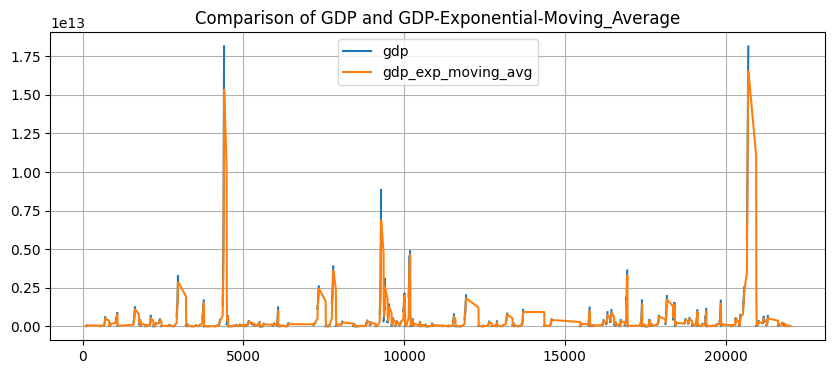

In [27]:
data[['gdp', 'gdp_exp_moving_avg']].plot(label='RELIANCE',figsize=(10, 4))
plt.title("Comparison of GDP and GDP-Exponential-Moving_Average")
plt.grid()
plt.show()

####  <span style="color:green"> The visualization leads us to conclude that the Exponential Moving Average effectively represents the original GDP values. </span>

In [28]:
# Replace NaN values in 'gdp' column with values from 'gdp_exp_moving_avg' column
data['gdp'] = data['gdp'].fillna(data['gdp_exp_moving_avg'])

In [29]:
data.isna().sum()

country                    0
year                       0
iso_code                  37
population                 0
gdp                        0
                          ..
wind_electricity           0
wind_energy_per_capita     0
wind_share_elec            0
wind_share_energy          0
gdp_exp_moving_avg         0
Length: 130, dtype: int64

# Exploratory Data Analysis (EDA)

In [30]:
stacked_df = pd.DataFrame(data[["year","biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]])

# Grouping the stacked_df

A = stacked_df.groupby('year')[["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]].sum()

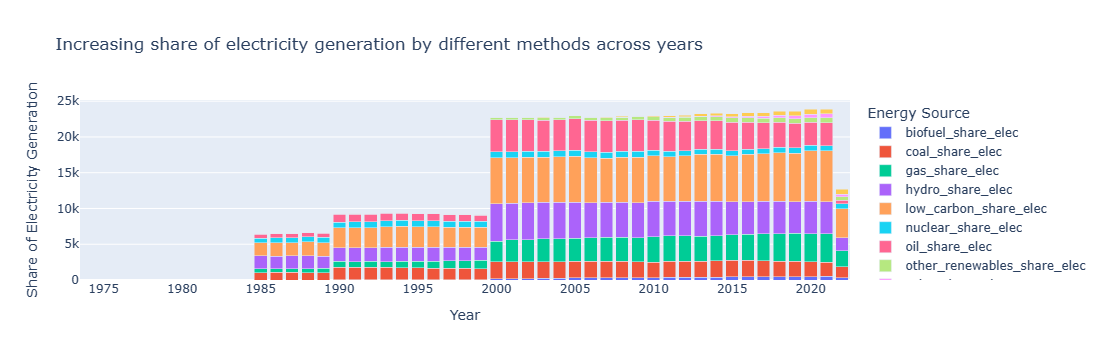

In [31]:
fig = px.bar(A, 
             x=A.index,
             y=["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"],
             title="Increasing share of electricity generation by different methods across years",
             labels={"value": "Share of Electricity Generation", "variable": "Energy Source", "year": "Year"},
             barmode='stack'
            )

fig.show()


#### <span style="color:green"> Over the years, there has been a clear upward trend in electricity generation capacities, which may be attributed to the following factors: </span>

1. Adoption of technology from more developed countries.
2. Increased focus on renewable energy sources, leading to these sudden spikes.

<span style="color:green"> Additionally, the instances of sudden increases observed in the visualization could be due to inaccuracies in the data collection process. </span>

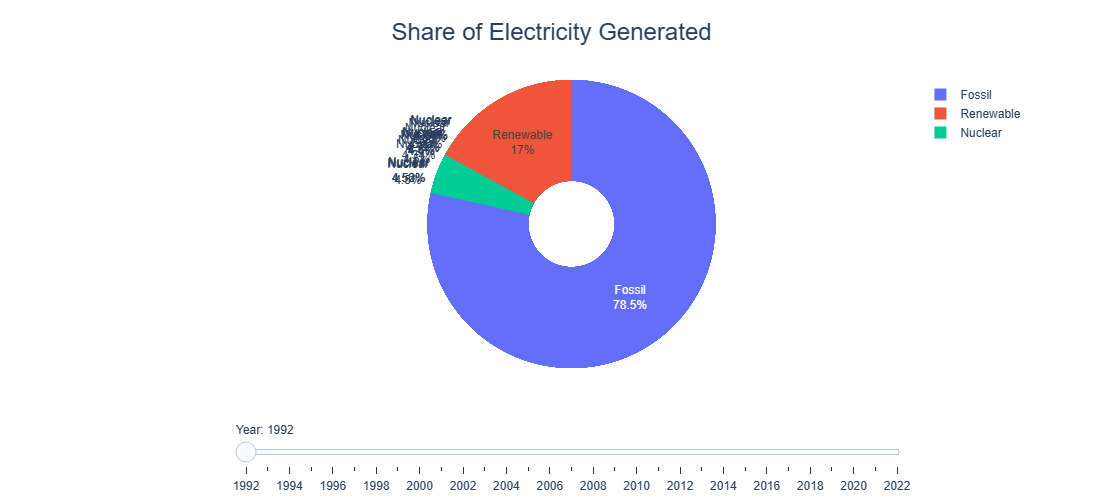

In [32]:

from plotly.subplots import make_subplots

# Assuming you have the 'B' DataFrame as described in your code

B = data.groupby('year')[['fossil_share_energy','renewables_share_energy','nuclear_share_energy']].mean().reset_index()
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])



# Assuming you have the 'B' DataFrame as described in your code

# Create subplots with one pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

# Loop through each year from 1992 to 2022
for year in range(1992, 2023):
    # Filter data for the current year
    filtered_df = B[B['year'] == year]
    
    # Add a pie trace for the current year
    fig.add_trace(go.Pie(
                    labels=['Fossil', 'Renewable', 'Nuclear'],
                    values=[filtered_df['fossil_share_energy'].values[0],
                            filtered_df['renewables_share_energy'].values[0],
                            filtered_df['nuclear_share_energy'].values[0]],
                    textinfo='label+percent', hole=.3))

# Define slider steps for each year
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{'visible': [False] * len(fig.data)},
              {'title_text': f'{2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
        label=str(1992 + i)
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

# Make the first trace visible by default
fig.data[0].visible = True

# Update layout with title, slider, and formatting
fig.update_layout(
    title_text=f'Share of Electricity Generated',
    title_font_size=24,
    title_x=0.5,
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Year: "},
        pad={"t": 50},
        steps=steps
    )],
    height=500,
    width=1000,
    font=dict(family='Arial', size=12),
    margin=dict(t=80, l=50, r=50, b=50)
)

# Show the plot
fig.show()


#### <span style="color:green">An examination of the distribution over the years reveals a clear trend towards an increased focus and inclination for generating energy from renewable sources. </span>

In [33]:

def sparklines(ascending=False):
    # Assuming you have the 'data' DataFrame as described in your code

    # Select relevant columns
    D = data[['electricity_generation', 'electricity_demand', 'year', 'country', 'energy_per_capita', 'population']]

    # Group by country and calculate the mean population, select top/bottom 5
    A = data.groupby('country')['population'].mean().reset_index().sort_values(by='population', ascending=ascending).head()['country'].tolist()

    # Filter data based on conditions
    D = D[(D['electricity_demand'] != 0) & (D['country'].isin(A))]

    # Generate sparklines plot
    title = "Energy Per Capita of Top 5 countries population wise" if not ascending else "Energy Per Capita of Bottom 5 countries population wise"
    fig = px.line(D, x="year", y="energy_per_capita", facet_row="country", color='country', symbol="country",
                  facet_row_spacing=0.01, height=500, width=1000, title=title)

    # Adjust layout
    fig.update_yaxes(visible=True, fixedrange=True, nticks=2, showgrid=False, zeroline=False, title=None)
    fig.update_layout(annotations=[], overwrite=True, showlegend=True, plot_bgcolor="black", margin=dict(t=35, l=10, b=10, r=10))
    fig.show(config=dict(displayModeBar=False))


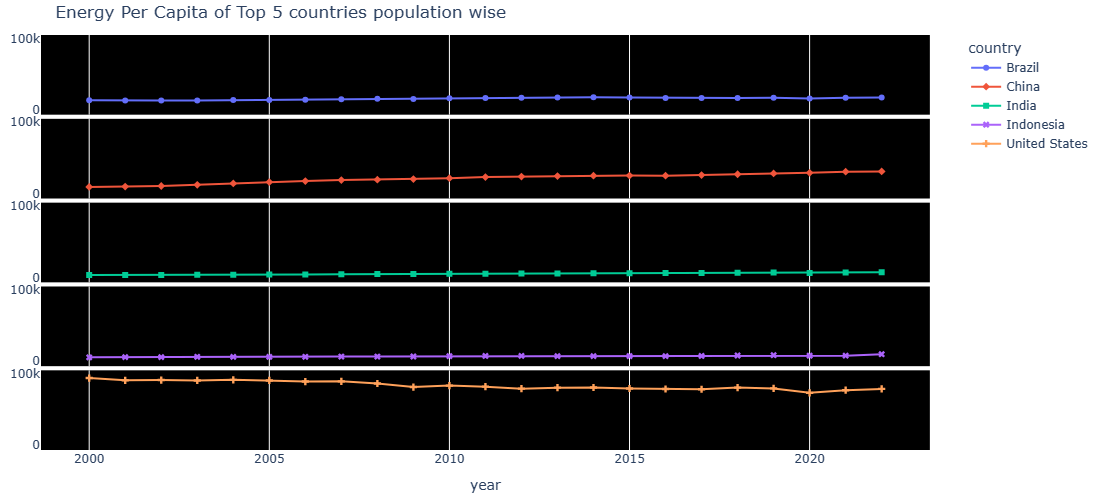

In [34]:
sparklines() 

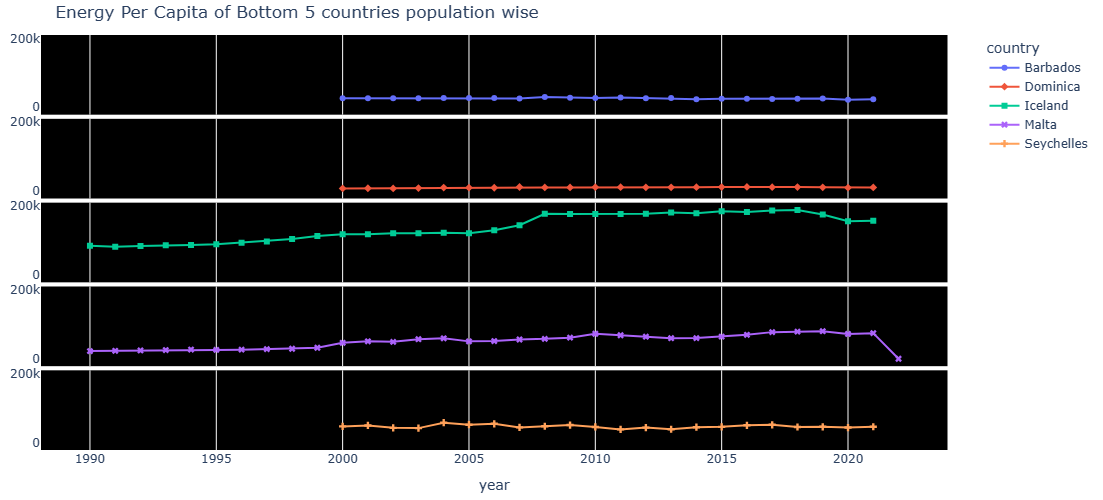

In [35]:
sparklines(True)   

#### <span style="color:green"> Upon observing the y-axis positioning of the sparklines, a twofold difference in values is noted between the TOP-5 and BOTTOM-5. It can be concluded that countries with larger populations tend to have lower energy_per_capita, and conversely, countries with smaller populations exhibit higher energy_per_capita.</span>

In [36]:
E = data[data['year']>=2000].groupby(['year','country'])[['electricity_demand','electricity_generation']].mean().reset_index()
E['ratio'] = E['electricity_generation']/E['electricity_demand']

E['electricity_demand'] = E['electricity_demand'].mask(E.electricity_demand == 0, 1)
E['electricity_demand'] = np.log(E['electricity_demand'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_demand <= 0 | E.electricity_demand.isna()), 0)


E['electricity_generation'] = E['electricity_generation'].mask(E.electricity_generation == 0, 1)
E['electricity_generation'] = np.log(E['electricity_generation'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_generation <= 0 | E.electricity_generation.isna()), 0)

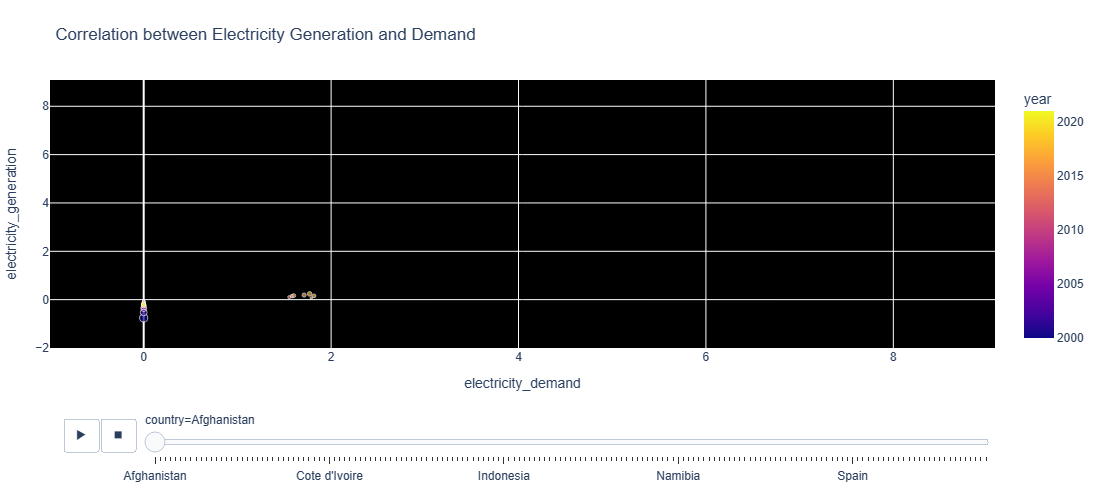

In [37]:
# fig = px.scatter(E,x= 'electricity_demand', y = 'electricity_generation',color = "year")

fig = px.scatter(E,x = 'electricity_demand', y = 'electricity_generation',
                 animation_frame = 'country',color = 'year',title = 'Correlation between Electricity Generation and Demand',size = abs(E.electricity_generation),
                 hover_name="country",  labels={'y':'Electricity Demand in terawatt-hours'},
                range_x=[-1,E.electricity_demand.max()], range_y=[-2,E.electricity_generation.max()])
fig.update_yaxes(visible=True, zeroline=False)

fig.update_layout(
        showlegend=True,
        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

fig.show()

#### <span style="color:green"> The visualization suggests that the demand and supply of electricity have been steadily increasing over the years. Interestingly, in more developed nations such as the USA, Canada, UK, and France, there hasn't been a significant surge in demand or generation capacity, with values remaining relatively stable over several years.</span>
<span style="color:green"> This pattern is also observed in smaller European countries like Norway, the Netherlands, North Macedonia, Serbia, and Luxembourg.<span style="color:green"> In contrast, countries with emerging economies, including India, China, Argentina, and Israel, have exhibited a sharp upward trend.

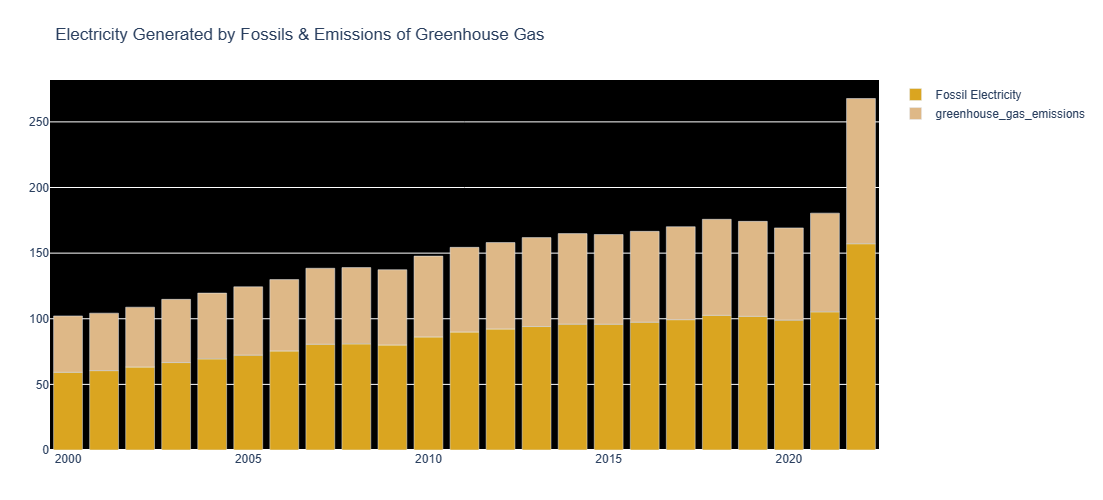

In [38]:
F = data[data.year >= 2000].groupby('year')[['greenhouse_gas_emissions','fossil_electricity']].mean().reset_index()

g1 = go.Bar(x=F.year, y=F.fossil_electricity, name = "Fossil Electricity",  marker_color='goldenrod')
# Create a line chart
g2 = go.Bar(x=F.year, y=F.greenhouse_gas_emissions, name = "greenhouse_gas_emissions",marker_color='burlywood')

fig = go.Figure(data=[g1,g2])

fig.update_layout(barmode='relative',title_text = "Electricity Generated by Fossils & Emissions of Greenhouse Gas",
        showlegend=True,
        plot_bgcolor="black",
                 height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))
fig.show()

 #### <span style="color:green"> Inspite of many measures and regulations, the greenhouse gas emissions has relatively grown over the past couple of decades which suggests there is a need for shifting focus on more renewable sources for energy generation.</span>

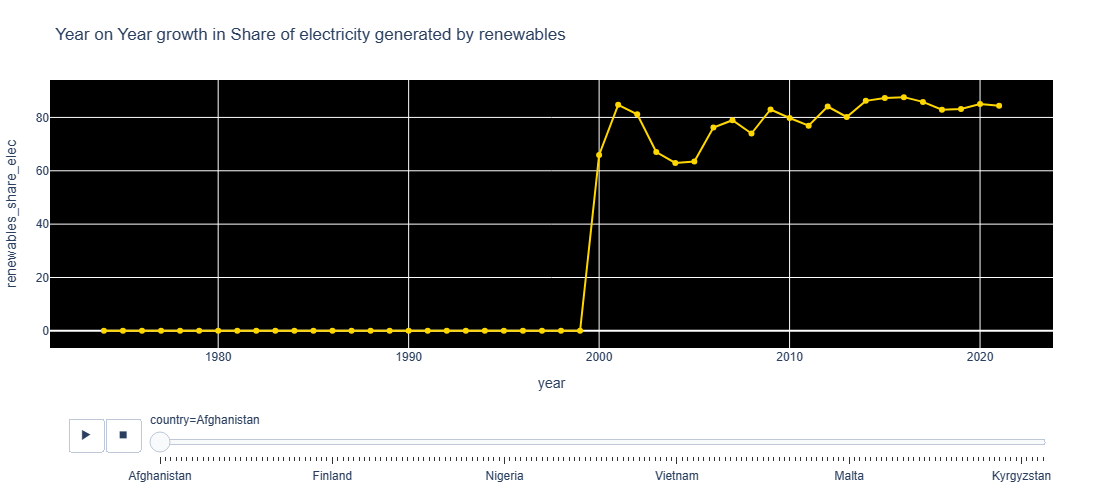

In [39]:
G = data.groupby(['year','country']).renewables_share_elec.mean().reset_index()

fig = px.line(G,x='year',y='renewables_share_elec',animation_frame='country', color_discrete_sequence=['gold'], markers=True,
        title = "Year on Year growth in Share of electricity generated by renewables")

fig.update_layout(
        
        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

#### With continuous advancements and focus of International groups and countries to promote renewable sources as the primary sources of energy, many countries are continuously increasing their focus to renewable sources for the energy securities of their respective states.

<span style="color:green">  we saw in the previous chart that greenhouse gas emission is still increasing inspite the fact that companies started to adapt more and more renewable sources for electricity generation. Hopefully if the trend continuous, maybe in a couple of decades, we can minimize this greenhouse gas emissions caused by electricity generation.

Now, we have basic understanding of our data, so moving ahead, we should look at computing more complex tasks : 

## Classifying countries based on their energy security and self-sufficiency

- Target label: A categorical label representing different levels of energy self-sufficiency (e.g., "High Self-Sufficiency," "Moderate Self-Sufficiency," "Low Self-Sufficiency").
- Rationale: This classification task could help identify countries that are heavily reliant on energy imports and potential areas for increasing domestic energy production or diversification.

# Data Preprocessing 

In [40]:
data.net_elec_imports.loc[data.net_elec_imports == 0] = 1

In [41]:
data['energy_production_ratio'] = data.electricity_generation/data.net_elec_imports

In [42]:
data.energy_production_ratio.describe()

count     7362.000000
mean        20.557277
std        692.227233
min     -14206.454545
25%          0.000000
50%          0.000000
75%         14.610000
max      24327.000000
Name: energy_production_ratio, dtype: float64

<Axes: ylabel='energy_production_ratio'>

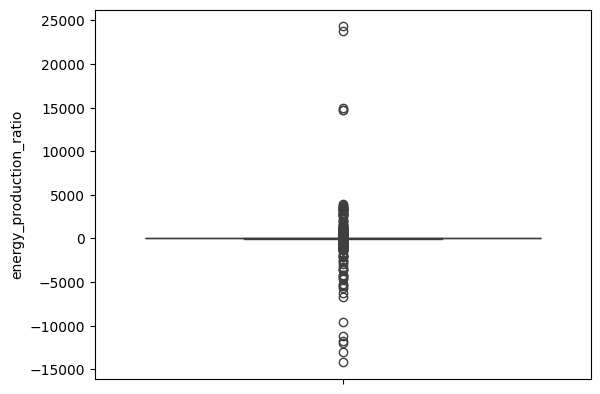

In [43]:
sns.boxplot(data['energy_production_ratio'])

### Creating a ratio that gives us an estimate of how much electricity is being generated divided by Net electricity imports .


#### Columns like net_elec_imports, energy_production_ratio, various types of energy production values, per_capita energy generation values can help in building a better model, hence we need to drop the rest of the columns and more closely observe features which are of greater significance for us.

In [44]:

ls = ['change_pct','change_twh','share_elec','cons_per_capita','prod_per_capita',
      'carbon_intensity_elec','energy_per_gdp','fossil_electricity','greenhouse_gas_emissions','other_renewable_exc_biofuel_electricity',
     'other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','iso_code',
     ]

unnec = []

# Loop through unique column names in the DataFrame
for i in data.columns.unique():
    # Check if the last 10 characters of the column name match any suffix in the list
    if i[-10:] in ls:
        unnec.append(i)
    # Check if the last 12 characters of the column name match any suffix in the list
    elif i[-12:] in ls:
        unnec.append(i)
    # Check if the last 15 characters of the column name match any suffix in the list, or the column name is directly in the list
    elif i[-15:] in ls or i in ls:
        unnec.append(i)

# Drop the columns identified as unnecessary
data1 = data.drop(unnec,axis = 1)

In [45]:
data1.head()

country  year  population           gdp  biofuel_consumption  \
97   Afghanistan  1974  11869881.0  1.430911e+10                  0.0   
98   Afghanistan  1975  12157390.0  1.517777e+10                  0.0   
99   Afghanistan  1976  12425276.0  1.602361e+10                  0.0   
100  Afghanistan  1977  12687308.0  1.520736e+10                  0.0   
101  Afghanistan  1978  12938864.0  1.633783e+10                  0.0   

     biofuel_elec_per_capita  biofuel_electricity  biofuel_share_energy  \
97                       0.0                  0.0                   0.0   
98                       0.0                  0.0                   0.0   
99                       0.0                  0.0                   0.0   
100                      0.0                  0.0                   0.0   
101                      0.0                  0.0                   0.0   

     coal_consumption  coal_elec_per_capita  ...  solar_electricity  \
97                0.0                   0.0  ...                0.0   
98                0.0                   0.0  ...                0.0   
99                0.0                   0.0  ...                0.0   
100               0.0                   0.0  ...                0.0   
101               0.0                   0.0  ...                0.0   

     solar_energy_per_capita  solar_share_energy  wind_consumption  \
97                       0.0                 0.0               0.0   
98                       0.0                 0.0               0.0   
99                       0.0                 0.0               0.0   
100                      0.0                 0.0               0.0   
101                      0.0                 0.0               0.0   

     wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
97                    0.0               0.0                     0.0   
98                    0.0               0.0                     0.0   
99                    0.0               0.0                     0.0   
100                   0.0               0.0                     0.0   
101                   0.0               0.0                     0.0   

     wind_share_energy  gdp_exp_moving_avg  energy_production_ratio  
97                 0.0        1.430911e+10                      0.0  
98                 0.0        1.478687e+10                      0.0  
99                 0.0        1.528403e+10                      0.0  
100                0.0        1.525877e+10                      0.0  
101                0.0        1.556854e+10                      0.0  

[5 rows x 74 columns]

In [46]:
data1.describe().T

count          mean           std           min  \
year                     7362.0  1.999239e+03  1.350272e+01  1.974000e+03   
population               7362.0  3.876723e+07  1.343326e+08  6.531000e+04   
gdp                      7362.0  4.158519e+11  1.392995e+12  1.642060e+08   
biofuel_consumption      7362.0  2.272374e+00  1.991147e+01  0.000000e+00   
biofuel_elec_per_capita  7362.0  3.966642e+01  1.659464e+02  0.000000e+00   
...                         ...           ...           ...           ...   
wind_electricity         7362.0  2.052862e+00  2.012127e+01  0.000000e+00   
wind_energy_per_capita   7362.0  1.121144e+02  5.432133e+02  0.000000e+00   
wind_share_energy        7362.0  2.874446e-01  1.395959e+00  0.000000e+00   
gdp_exp_moving_avg       7362.0  3.989663e+11  1.267110e+12  3.340524e+08   
energy_production_ratio  7362.0  2.055728e+01  6.922272e+02 -1.420645e+04   

                                  25%           50%           75%  \
year                     1.988000e+03  2.000000e+03  2.011000e+03   
population               3.655583e+06  9.523066e+06  2.623293e+07   
gdp                      1.730363e+10  6.065213e+10  2.533734e+11   
biofuel_consumption      0.000000e+00  0.000000e+00  0.000000e+00   
biofuel_elec_per_capita  0.000000e+00  0.000000e+00  3.736750e+00   
...                               ...           ...           ...   
wind_electricity         0.000000e+00  0.000000e+00  0.000000e+00   
wind_energy_per_capita   0.000000e+00  0.000000e+00  0.000000e+00   
wind_share_energy        0.000000e+00  0.000000e+00  0.000000e+00   
gdp_exp_moving_avg       2.153788e+10  7.502624e+10  2.585654e+11   
energy_production_ratio  0.000000e+00  0.000000e+00  1.461000e+01   

                                  max  
year                     2.022000e+03  
population               1.425894e+09  
gdp                      1.815160e+13  
biofuel_consumption      4.338660e+02  
biofuel_elec_per_capita  2.514102e+03  
...                               ...  
wind_electricity         8.005200e+02  
wind_energy_per_capita   8.422012e+03  
wind_share_energy        2.615700e+01  
gdp_exp_moving_avg       1.654487e+13  
energy_production_ratio  2.432700e+04  

[73 rows x 8 columns]

There are way too many zero's in the dataset but it is quite understandable because many countries do not have enough resources or inhouse facilities to generate energy, or produce different kind of sources that are key for energy generation or might they are not very economically strong to setup plants for energy generation or are less technically advanced.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer

In [48]:
# Creating a list called 'scaling' of all the columns of object(not numbers) data type excluding the year column

data1.select_dtypes(exclude = 'object').columns.to_list()

scaling = [] + data1.select_dtypes(exclude = 'object').columns.to_list()[1:]

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler

# Pipeline object to demonstrate sequential processing

pipe = Pipeline([("minmaxscale",MinMaxScaler())])

# Column Transformers to apply a set of transformation to specifically mentioned columns parallely and concatenates the 
# transformed outputs from different transformations into a single matrix.

Ct = ColumnTransformer([('pipe',pipe,scaling),  # Applying MinMaxScaler to columns in 'scaling'
                       ('ss',StandardScaler(),['year'])], # Applying StandardScaler to 'year' column
                       remainder = 'passthrough', verbose_feature_names_out= False) # Remaining columns will not be transformed

data1_transformed = Ct.fit_transform(data1)


In [50]:
# Extracting column names except the first two columns

cols = list(data1.columns.unique())[2:]

# Creating a DataFrame with transformed data

df1 = pd.DataFrame(data1_transformed,columns = cols + ['year','country'])

Our target will be significantly impacted by column:
- Our self-generated column `energy_production_ratio`

We need to establish a rationale for the values of this column. A higher value in the `energy_production_ratio` column indicates a country's self-sufficiency in energy production

For this task, let us look at different percentile values of this column and try to establish a threshold so that class distribution can project the actual distribution of self-sufficiency of world countries.

In [51]:
# Printing percentiles for 'energy_production_ratio'

for i in range(1,101):
    print(f"energy_production_ratio at percentile {i} is {(np.percentile(df1['energy_production_ratio'],i)):.7f}")

energy_production_ratio at percentile 1 is 0.3526228
energy_production_ratio at percentile 2 is 0.3606714
energy_production_ratio at percentile 3 is 0.3645017
energy_production_ratio at percentile 4 is 0.3658675
energy_production_ratio at percentile 5 is 0.3667305
energy_production_ratio at percentile 6 is 0.3673047
energy_production_ratio at percentile 7 is 0.3676793
energy_production_ratio at percentile 8 is 0.3679448
energy_production_ratio at percentile 9 is 0.3681478
energy_production_ratio at percentile 10 is 0.3682846
energy_production_ratio at percentile 11 is 0.3683530
energy_production_ratio at percentile 12 is 0.3684244
energy_production_ratio at percentile 13 is 0.3684617
energy_production_ratio at percentile 14 is 0.3685078
energy_production_ratio at percentile 15 is 0.3685479
energy_production_ratio at percentile 16 is 0.3686380
energy_production_ratio at percentile 17 is 0.3686785
energy_production_ratio at percentile 18 is 0.3686785
energy_production_ratio at percentile

In [52]:
# Creating Target Column
# Assigning initial value 'Unknown' to the 'target' column

df1['target'] = 'Unknown'

# High Self-Sufficiency
mask = (df1['energy_production_ratio'] >= (np.percentile(df1['energy_production_ratio'],75)))
df1.loc[mask, 'target'] = 'High Self-Sufficiency'

# Moderate Self-Sufficiency
mask = df1['energy_production_ratio'].between(0.3686380,0.3690187)
df1.loc[mask, 'target'] = 'Moderate Self-Sufficiency'

# Low Self-Sufficiency
mask = df1['energy_production_ratio'] <= (np.percentile(df1['energy_production_ratio'],16))
df1.loc[mask, 'target'] = 'Low Self-Sufficiency'

In [54]:
# Filtering rows with 'target' as 'Unknown' and sorting by certain columns

df1[df1.target == 'Unknown'][['energy_production_ratio','target']].sort_values(['energy_production_ratio'],ascending = [False])

energy_production_ratio   target
5794                0.369057  Unknown
227                 0.369057  Unknown
79                  0.369057  Unknown
3926                0.369056  Unknown
5796                0.369055  Unknown
...                      ...      ...
237                 0.369022  Unknown
3268                0.369022  Unknown
6761                0.369021  Unknown
2892                0.369021  Unknown
5309                0.369019  Unknown

[72 rows x 2 columns]

In [55]:
# There are still many Unknowns, lets check the distribution
df1.target.value_counts()

target
Moderate Self-Sufficiency    4270
High Self-Sufficiency        1842
Low Self-Sufficiency         1178
Unknown                        72
Name: count, dtype: int64

In [56]:
df1['target'] = df1['target'].replace({"Low Self-Sufficiency":0, 
                                       "Moderate Self-Sufficiency":1, 
                                       "High Self-Sufficiency":2, 
                                       "Unknown":3})
df1.target.value_counts()

target
1    4270
2    1842
0    1178
3      72
Name: count, dtype: int64

In [57]:
df1.head()

population       gdp biofuel_consumption biofuel_elec_per_capita  \
0   0.008279  0.000779                 0.0                     0.0   
1   0.008481  0.000827                 0.0                     0.0   
2   0.008669  0.000874                 0.0                     0.0   
3   0.008852  0.000829                 0.0                     0.0   
4   0.009029  0.000891                 0.0                     0.0   

  biofuel_electricity biofuel_share_energy coal_consumption  \
0                 0.0                  0.0              0.0   
1                 0.0                  0.0              0.0   
2                 0.0                  0.0              0.0   
3                 0.0                  0.0              0.0   
4                 0.0                  0.0              0.0   

  coal_elec_per_capita coal_electricity coal_production  ... wind_consumption  \
0                  0.0              0.0        0.000037  ...              0.0   
1                  0.0              0.0        0.000048  ...              0.0   
2                  0.0              0.0        0.000051  ...              0.0   
3                  0.0              0.0        0.000054  ...              0.0   
4                  0.0              0.0        0.000069  ...              0.0   

  wind_elec_per_capita wind_electricity wind_energy_per_capita  \
0                  0.0              0.0                    0.0   
1                  0.0              0.0                    0.0   
2                  0.0              0.0                    0.0   
3                  0.0              0.0                    0.0   
4                  0.0              0.0                    0.0   

  wind_share_energy gdp_exp_moving_avg energy_production_ratio      year  \
0               0.0           0.000845                0.368678 -1.869331   
1               0.0           0.000874                0.368678 -1.795267   
2               0.0           0.000904                0.368678 -1.721203   
3               0.0           0.000902                0.368678 -1.647139   
4               0.0           0.000921                0.368678 -1.573075   

       country target  
0  Afghanistan      1  
1  Afghanistan      1  
2  Afghanistan      1  
3  Afghanistan      1  
4  Afghanistan      1  

[5 rows x 75 columns]

In [58]:
# Since the model will only accept numeric values in label, we will use label encoder to encode every class to a specific number
# For Example 
# Moderate Self-Sufficiency - > 2
# Low Self-Sufficiency - > 1 
# High Self-Sufficiency -> 0
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder()
df1['country'] = le.fit_transform(df1['country'].values.reshape(-1,1))

In [59]:
# Although the target label is now encoded, it creates a sort of order which when an algorithm is getting trained, will consider as actual values
# To overcome this challenge, we use One-Hot Vectors which creates an array of size corresponding to the number of classes with value 1 for actual class and 0 for rest
# For Example = 
# 1 - > [1,0,0]
# 2 - > [0,1,0]
# 3 - > [0,0,1]

ohe = OneHotEncoder()

df1.country = ohe.fit_transform(np.array(df1.country).reshape(-1,1))

In [60]:
# Using StratifiedShuffleSplit to split the data based on the distribution of target label into train set and test set

split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state = 42)
for train_index,test_index in split.split(np.zeros(len(data)),df1.target):
    train_set = df1.loc[train_index]
    test_set = df1.loc[test_index]

In [61]:
# Spliting train data into train data's features and labels

# xtrain,ytrain = train_set.drop('target',axis = 1),train_set.target
df1_train, df1_test =train_test_split(df1, test_size=0.25, random_state=25)

In [62]:
df1_train_x = train_set.iloc[:,:-1]
df1_train_y = train_set.iloc[:,-1]

df1_test_x = test_set.iloc[:,:-1]
df1_test_y = test_set.iloc[:,-1]

In [63]:
# Spliting test data into test data's features and labels

# xtest,ytest = test_set.drop('target',axis = 1),test_set.target

# Data Modelling

### Staring with Logistic Regression

In [64]:
logics = LogisticRegression(random_state = 42,max_iter=1000)
cv_logics= cross_validate(logics, df1_train_x, df1_train_y, cv = 5,                          
                           scoring=['precision_micro', 'recall_micro', 'f1_micro'],  
                           return_train_score=True,
                           return_estimator=True)
cv_logics

{'fit_time': array([3.04258728, 2.32210279, 2.3044064 , 2.27962995, 2.68229342]),
 'score_time': array([0.03534913, 0.01750016, 0.01632881, 0.03351688, 0.02470565]),
 'estimator': [LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42)],
 'test_precision_micro': array([0.74479638, 0.76268116, 0.75996377, 0.73460145, 0.77264493]),
 'train_precision_micro': array([0.76336051, 0.76545166, 0.76205569, 0.76001811, 0.76409328]),
 'test_recall_micro': array([0.74479638, 0.76268116, 0.75996377, 0.73460145, 0.77264493]),
 'train_recall_micro': array([0.76336051, 0.76545166, 0.76205569, 0.76001811, 0.76409328]),
 'test_f1_micro': array([0.74479638, 0.76268116, 0.75996377, 0.73460145, 0.77264493]),
 'train_f1_micro': array([0.76336051, 0.76545166, 0.76205569, 0.76001811, 0.76409328])}

In [65]:
# Getting mean scores

for i,j in cv_logics.items():
    if type(j)== np.ndarray:
        print(f"{i} Mean is {np.mean(j):.4f}")

fit_time Mean is 2.5262
score_time Mean is 0.0255
test_precision_micro Mean is 0.7549
train_precision_micro Mean is 0.7630
test_recall_micro Mean is 0.7549
train_recall_micro Mean is 0.7630
test_f1_micro Mean is 0.7549
train_f1_micro Mean is 0.7630


#### Hyperparameter Tuning of Logistic Regression


In [66]:
grid = {'max_iter' : [100,1000,10000], 'tol' : [1e-4,1e-3,1e-5], 'penalty' : ['l1','l2','elasticnet']}

grid_logics = GridSearchCV(logics, param_grid = grid, scoring = 'f1_micro',cv = 5, n_jobs = -1) # have used micro because my label is a multiclass onehot vector

grid_logics.fit(df1_train_x, df1_train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.0001, 0.001, 1e-05]},
             scoring='f1_micro')

In [67]:
print(grid_logics.best_params_)

best_log = grid_logics.best_estimator_    # To get the model with best parameters
best_log.fit(df1_train_x, df1_train_y)

{'max_iter': 10000, 'penalty': 'l2', 'tol': 1e-05}


LogisticRegression(max_iter=10000, random_state=42, tol=1e-05)

In [68]:
# Getting Scores on train and test sets

print(best_log.score(df1_train_x, df1_train_y))
print(best_log.score(df1_test_x, df1_test_y))

0.7737728672341967
0.7648017381857686


In [69]:
best_log_predict = best_log.predict(df1_test_x)

In [70]:
from sklearn.metrics import f1_score, confusion_matrix
f1_score(df1_test_y,best_log_predict, average='micro')

0.7648017381857686

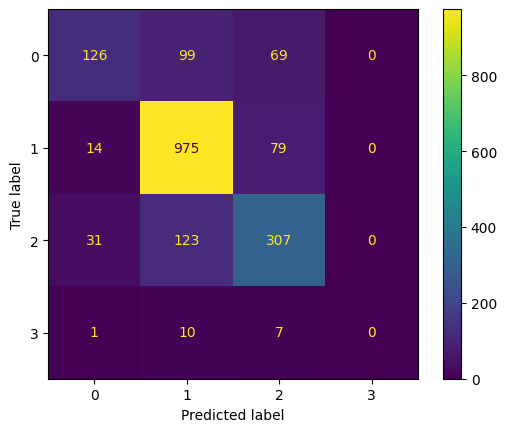

In [71]:
ConfusionMatrixDisplay.from_predictions(df1_test_y, best_log_predict)

In [72]:
confusion_matrix(df1_test_y,best_log_predict)

array([[126,  99,  69,   0],
       [ 14, 975,  79,   0],
       [ 31, 123, 307,   0],
       [  1,  10,   7,   0]], dtype=int64)

## Let's Try Feature Engineering that might help yield better results

In [73]:
from sklearn.feature_selection import RFE

selector = RFE(best_log, n_features_to_select = 25, step=1)
new_train_x = df1_train_x
selector = selector.fit(new_train_x, df1_train_y)
print(f'Rank of each feature is : {selector.support_}')

Rank of each feature is : [ True False False  True False False False  True False False False  True
  True  True  True  True False  True False False  True  True  True  True
 False False False False  True False False False False False False  True
 False  True False False False  True False False  True  True  True False
 False False False False  True  True False False False False  True False
 False False False False False False  True False False False False  True
 False False]


In [74]:
new_train_x = selector.transform(df1_train_x)
best_log.fit(new_train_x, df1_train_y)
print(best_log.score(new_train_x, df1_train_y))

0.7663466763267524


### <span style = 'color:red'>The below code might take some time to process </span>

In [75]:
from sklearn.feature_selection import RFECV

selector = RFECV(best_log, step=1)
new_train_x = df1_train_x
selector = selector.fit(new_train_x, df1_train_y)
print(f'Rank of each feature is : {selector.support_}')

Rank of each feature is : [ True False False  True False False False  True False False False  True
  True  True  True  True False  True False False  True  True  True  True
 False False False False  True  True False False False  True False  True
 False  True False False False  True False False  True  True  True  True
 False False  True False  True  True False False False False  True False
 False False False False False False  True False False False False  True
 False False]


In [76]:
print(f"No of features selected for modeling are : {len(list(filter(lambda x: x + 1 if x == 1 else False ,selector.ranking_)))}")
new_train_x = selector.transform(df1_train_x)
best_log.fit(new_train_x, df1_train_y)
print(best_log.score(new_train_x, df1_train_y))

No of features selected for modeling are : 29
0.776670892954175


In [77]:
# before proceeding, we need to fit the best estimator on original df1_train_x, 
#so that it remembers weights for original df1_train_x and retains its shape

best_log.fit(df1_train_x, df1_train_y)

LogisticRegression(max_iter=10000, random_state=42, tol=1e-05)

In [78]:
# To check key metrics of our model

from sklearn.metrics import classification_report
print(classification_report(df1_test_y, best_log.predict(df1_test_x)))

              precision    recall  f1-score   support

           0       0.73      0.43      0.54       294
           1       0.81      0.91      0.86      1068
           2       0.66      0.67      0.67       461
           3       0.00      0.00      0.00        18

    accuracy                           0.76      1841
   macro avg       0.55      0.50      0.52      1841
weighted avg       0.75      0.76      0.75      1841



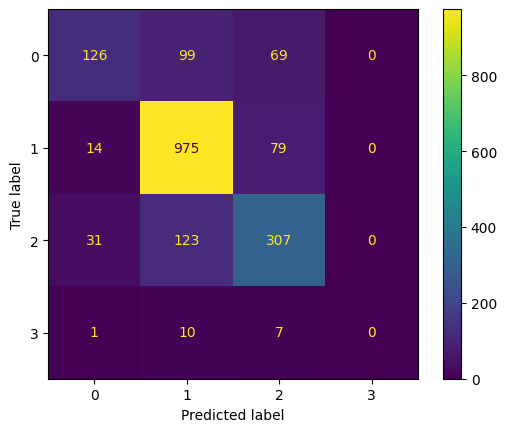

In [79]:
ConfusionMatrixDisplay.from_predictions(df1_test_y, best_log.predict(df1_test_x))

### Let's try a better Algorithm "Random Forest"

In [80]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(df1_train_x, df1_train_y)

RandomForestClassifier(random_state=42)

In [81]:
rfc.score(df1_train_x, df1_train_y)

1.0

In [82]:
rfc_predict = rfc.predict(df1_test_x)
f1_score(df1_test_y, rfc_predict,average = 'micro')

0.9929386203150462

In [83]:
print(classification_report(df1_test_y, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       0.99      1.00      1.00      1068
           2       1.00      1.00      1.00       461
           3       0.75      0.50      0.60        18

    accuracy                           0.99      1841
   macro avg       0.93      0.87      0.90      1841
weighted avg       0.99      0.99      0.99      1841



In [84]:
ConfusionMatrixDisplay.from_predictions(df1_test_y, rfc_predict)

In [85]:
#from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

dtc.fit(df1_train_x, df1_train_y)

DecisionTreeClassifier(random_state=42)

In [86]:
# estimators = [
#     ('knn',KNeighborsClassifier(n_neighbors=5, weights='uniform',n_jobs =-1)),
#     ("gbr",GradientBoostingClassifier(random_state = 42,)),
#     ('dt',DecisionTreeClassifier())
# ]
# voter = VotingClassifier(estimators=estimators,n_jobs = -1)

# voter.fit(xtrain,ytrain)

In [87]:
dtc.score(df1_train_x, df1_train_y)

1.0

In [88]:
dtc_predict = dtc.predict(df1_test_x)
f1_score(df1_test_y, dtc_predict , average = 'micro')

0.9989136338946225

In [89]:
print(classification_report(df1_test_y, dtc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00      1068
           2       1.00      1.00      1.00       461
           3       0.94      0.94      0.94        18

    accuracy                           1.00      1841
   macro avg       0.99      0.99      0.99      1841
weighted avg       1.00      1.00      1.00      1841



In [90]:
ConfusionMatrixDisplay.from_predictions(df1_test_y, dtc_predict )

In [91]:
pd.DataFrame({'Model' : ["LogisticRegression", "RandomForestClassifier", "DecisionTreeClassifier"],
              "Train Score " : [best_log.score(df1_train_x, df1_train_y),rfc.score(df1_train_x, df1_train_y),dtc.score(df1_train_x, df1_train_y)],
              "Test Score" : [best_log.score(df1_test_x, df1_test_y),rfc.score(df1_test_x, df1_test_y),dtc.score(df1_test_x, df1_test_y)]}).sort_values(by=['Test Score'],ascending = False)

Model  Train Score   Test Score
2  DecisionTreeClassifier      1.000000    0.998914
1  RandomForestClassifier      1.000000    0.992939
0      LogisticRegression      0.773773    0.764802

In [92]:
# df = data.select_dtypes(exclude='object')

In [93]:
# # df['target'] = 'Unknown'

# # # High Self-Sufficiency
# # mask = ((df['net_elec_imports_share_demand'] <= 0.894) & (df['energy_production_ratio'] >= 0.0000842))
# # df.loc[mask, 'target'] = 'High Self-Sufficiency'

# # # Moderate Self-Sufficiency
# # mask = (df['net_elec_imports_share_demand'].between(0.894,1)) & (df['energy_production_ratio'].between(0.0000120,1))
# # df.loc[mask, 'target'] = 'Moderate Self-Sufficiency'

# # # Low Self-Sufficiency
# # mask = (df['net_elec_imports_share_demand'] > 0.894090) & (df['energy_production_ratio'] <= 0.0000120)
# # df.loc[mask, 'target'] = 'Low Self-Sufficiency'
# df['primary_elec_generated'] = df['nuclear_electricity'] + df['coal_electricity'] + df['oil_electricity'] + df['gas_electricity'] + df['renewables_electricity']

# df.net_elec_imports.loc[df.net_elec_imports == 0] = 1

# df.energy_production_ratio = df['primary_elec_generated']/df.net_elec_imports 

In [94]:
# # Creating Target Column
# # Assigning initial value 'Unknown' to the 'target' column

# df['target'] = 'Unknown'

# # High Self-Sufficiency
# mask = (df['energy_production_ratio'] >= (np.percentile(df['energy_production_ratio'],75)))
# df.loc[mask, 'target'] = 'High Self-Sufficiency'

# # Moderate Self-Sufficiency
# mask = df['energy_production_ratio'].between(0.3686380,0.369035)
# df.loc[mask, 'target'] = 'Moderate Self-Sufficiency'

# # Low Self-Sufficiency
# mask = df['energy_production_ratio'] <= (np.percentile(df['energy_production_ratio'],16))
# df.loc[mask, 'target'] = 'Low Self-Sufficiency'

In [95]:
# df['target'] = df['target'].replace({"Low Self-Sufficiency":0, 
#                                        "Moderate Self-Sufficiency":1, 
#                                        "High Self-Sufficiency":2, 
#                                        "Unknown":3})
# # knn_imputer = KNNImputer(missing_values=3,n_neighbors= 5, weights='distance')
# # df.target = knn_imputer.fit_transform(np.array(df.target).reshape(-1,1))

# # df.loc[~df.target.isin([0,1,2]),'target'] = (df.loc[~df.target.isin([0,1,2]),'target']).astype(int)

In [96]:
# df.head()

In [97]:
# correlation = (df.corr()['target'].abs().sort_values(ascending = False))*100
# col= np.round(correlation,0)[np.round(correlation,0)>5]
# col.index.tolist()